1. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [4]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print("Dataset shape:", df.shape)
print("Feature names:", data.feature_names)
print("Target names:", data.target_names)

print(df.head())


Dataset shape: (569, 31)
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1         

2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

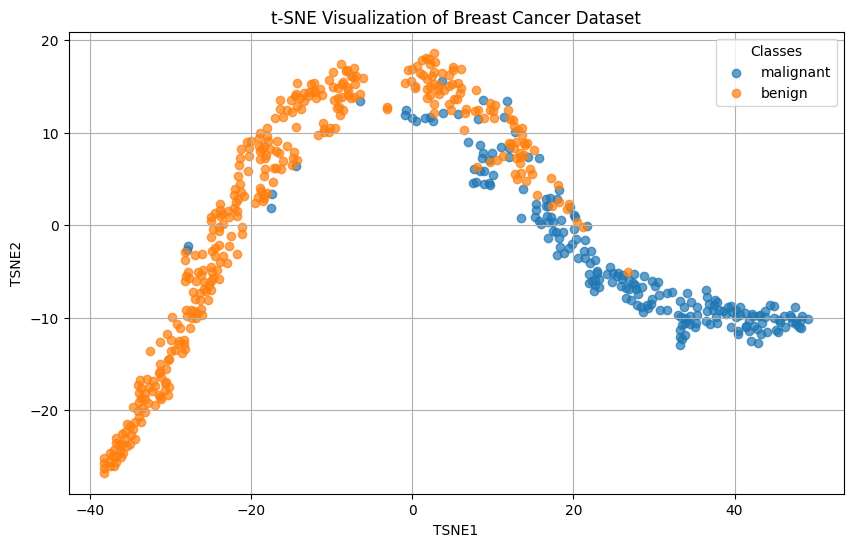

In [5]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

df_tsne = pd.DataFrame(X_embedded, columns=['TSNE1', 'TSNE2'])
df_tsne['target'] = y

plt.figure(figsize=(10, 6))
for target_value, target_name in enumerate(data.target_names):
    subset = df_tsne[df_tsne['target'] == target_value]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=target_name, alpha=0.7)

plt.title('t-SNE Visualization of Breast Cancer Dataset')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend(title="Classes")
plt.grid(True)
plt.show()


3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [6]:
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = data.data
y = data.target

test_size = 0.2
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

dt_classifier = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=42,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.05,
    monotonic_cst=None
)

dt_classifier.fit(X_train, y_train)

y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))
print("\nConfusion Matrix (Test Set):\n", confusion_matrix(y_test, y_test_pred))


Training Accuracy: 0.9208791208791208
Testing Accuracy: 0.8947368421052632

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        43
           1       0.94      0.89      0.91        71

    accuracy                           0.89       114
   macro avg       0.89      0.90      0.89       114
weighted avg       0.90      0.89      0.90       114


Confusion Matrix (Test Set):
 [[39  4]
 [ 8 63]]


5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf_classifier = RandomForestClassifier(
    n_estimators=200,
    criterion='gini',
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.05,
    max_samples=None,
    monotonic_cst=None
)

rf_classifier.fit(X_train, y_train)

y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))
print("\nConfusion Matrix (Test Set):\n", confusion_matrix(y_test, y_test_pred))


Training Accuracy: 0.9560439560439561
Testing Accuracy: 0.9649122807017544

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Confusion Matrix (Test Set):
 [[40  3]
 [ 1 70]]


6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

model_adaboost = AdaBoostClassifier(
    estimator=None,
    n_estimators=500,
    learning_rate=0.2,
    algorithm='SAMME.R',
    random_state=42
)

model_adaboost.fit(X_train, y_train)
y_test_pred_ab = model_adaboost.predict(X_test)
ab_accuracy = accuracy_score(y_test, y_test_pred_ab)
ab_f1 = f1_score(y_test, y_test_pred_ab)

ab_classification_report = classification_report(y_test, y_test_pred_ab)
ab_confusion_matrix = confusion_matrix(y_test, y_test_pred_ab)

print("Accuracy:", ab_accuracy)
print("F1 Score:", ab_f1)
print("Classification Report:\n", ab_classification_report)
print("Confusion Matrix:\n", ab_confusion_matrix)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.9736842105263158
F1 Score: 0.9790209790209791
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
 [[41  2]
 [ 1 70]]


7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner


In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#DecisionTree
y_test_pred_dt = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_test_pred_dt)
dt_f1 = f1_score(y_test, y_test_pred_dt)
dt_classification_report = classification_report(y_test, y_test_pred_dt)
dt_confusion_matrix = confusion_matrix(y_test, y_test_pred_dt)

#RandomForest
y_test_pred_rf = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_test_pred_rf)
rf_f1 = f1_score(y_test, y_test_pred_rf)
rf_classification_report = classification_report(y_test, y_test_pred_rf)
rf_confusion_matrix = confusion_matrix(y_test, y_test_pred_rf)

#AdaBoost
y_test_pred_ab = model_adaboost.predict(X_test)
ab_accuracy = accuracy_score(y_test, y_test_pred_ab)
ab_f1 = f1_score(y_test, y_test_pred_ab)
ab_classification_report = classification_report(y_test, y_test_pred_ab)
ab_confusion_matrix = confusion_matrix(y_test, y_test_pred_ab)

#Results
print("Decision Tree:")
print("Accuracy:", dt_accuracy)
print("F1 Score:", dt_f1)
print("Classification Report:\n", dt_classification_report)
print("Confusion Matrix:\n", dt_confusion_matrix)

print("\nRandom Forest:")
print("Accuracy:", rf_accuracy)
print("F1 Score:", rf_f1)
print("Classification Report:\n", rf_classification_report)
print("Confusion Matrix:\n", rf_confusion_matrix)

print("\nAdaBoost:")
print("Accuracy:", ab_accuracy)
print("F1 Score:", ab_f1)
print("Classification Report:\n", ab_classification_report)
print("Confusion Matrix:\n", ab_confusion_matrix)

#########
print("\nComparison based on F1 Score:")
if dt_f1 > rf_f1 and dt_f1 > ab_f1:
    print("Winner: Decision Tree")
elif rf_f1 > dt_f1 and rf_f1 > ab_f1:
    print("Winner: Random Forest")
else:
    print("Winner: AdaBoost")


Decision Tree:
Accuracy: 0.8947368421052632
F1 Score: 0.9130434782608695
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        43
           1       0.94      0.89      0.91        71

    accuracy                           0.89       114
   macro avg       0.89      0.90      0.89       114
weighted avg       0.90      0.89      0.90       114

Confusion Matrix:
 [[39  4]
 [ 8 63]]

Random Forest:
Accuracy: 0.9649122807017544
F1 Score: 0.9722222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
 [[40  3]
 [ 1 70]]

AdaBoost:
Accuracy: 0.9736842105263158
F1 Score: 0.9790209790209791
Classi